<a href="https://colab.research.google.com/github/IYB-Mata/CCMACLRL_EXERCISES_COM232/blob/main/Vi%C3%B1as_Excercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [260]:
df = pd.read_csv('Personality.csv')
df.head()

,Name,Post/Shares frequently?,Active?,Replies to comments/message?,Number of friends/followers,Personality
0,John,1,1,1,1200,1
1,Alvin,1,1,1,1100,1
2,Roland,1,1,1,1900,1
3,Jeremiah,1,1,1,1100,1
4,Michael,1,1,1,3027,1


### Drop Name Column

In [261]:
#DROP NAME COLUMN
df.drop(columns = 'Name', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Post/Shares frequently?       99 non-null     int64
 1   Active?                       99 non-null     int64
 2   Replies to comments/message?  99 non-null     int64
 3   Number of friends/followers   99 non-null     int64
 4   Personality                   99 non-null     int64
dtypes: int64(5)
memory usage: 4.0 KB


Display the summary of all the features of the dataset using `.info()`

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Post/Shares frequently?       99 non-null     int64
 1   Active?                       99 non-null     int64
 2   Replies to comments/message?  99 non-null     int64
 3   Number of friends/followers   99 non-null     int64
 4   Personality                   99 non-null     int64
dtypes: int64(5)
memory usage: 4.0 KB


Display the total number of samples from each label using `.value_counts()`

In [263]:
df['Personality'].value_counts()

,count
Personality,
1,51
0,48


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

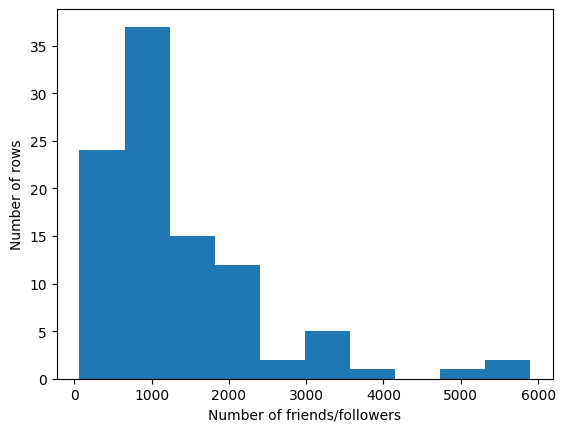

In [264]:
plt.hist(df["Number of friends/followers"])
plt.xlabel("Number of friends/followers")
plt.ylabel("Number of rows")
plt.show()

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [265]:
# Array of features
X = df.drop(columns=['Personality']).values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [266]:
# Array of Labels
y = df['Personality'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Display the dimensions of each variables using `.shape()`

In [268]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79, 4)
(79,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [269]:
knn = KNeighborsClassifier(n_neighbors=2)

Train the model using the `.fit()`

In [270]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

Test the model using the `.predict()`

In [271]:
# Test the model
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

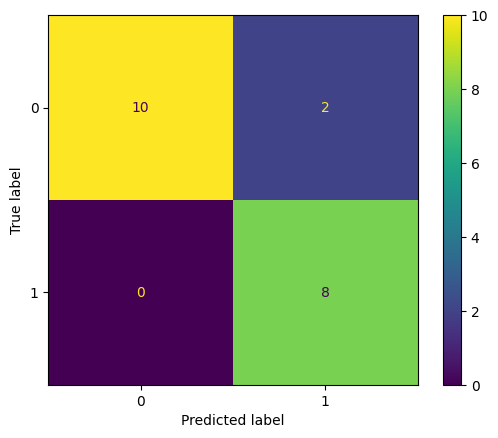

In [272]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [273]:
metrics.accuracy_score(y_test, y_pred)

0.9

Display the precision

In [274]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.83333333 1.        ]


Display the recall

In [275]:
# Calculate recall
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.  0.8]


Display the f1-score

In [276]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.90909091 0.88888889]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [277]:
knn.predict([[0,1,1,1000]])

array([0])

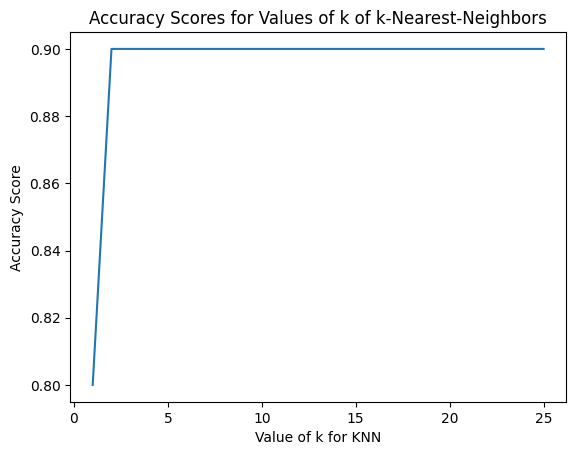

In [278]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()